This will test out the package on an Ising model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from base_model import Model
from rejection_free_monte_carlo import RFMC
from ising_model import Ising2D

In [2]:
temperatures = np.linspace(0.4, 20,20)
energies = np.zeros(np.shape(temperatures))
i = 0
for T in temperatures:
    model = Ising2D(7,7,T)
    print('Temperature = %1.2f'%T)
    x = RFMC(model)
    x.run(1e3)
    x.run(1e4)
    energies[i] = x.get_mean()/49
    i += 1

Temperature = 0.40
Temperature = 1.43
Temperature = 2.46
Temperature = 3.49
Temperature = 4.53
Temperature = 5.56
Temperature = 6.59
Temperature = 7.62
Temperature = 8.65
Temperature = 9.68
Temperature = 10.72
Temperature = 11.75
Temperature = 12.78
Temperature = 13.81
Temperature = 14.84
Temperature = 15.87
Temperature = 16.91
Temperature = 17.94
Temperature = 18.97
Temperature = 20.00


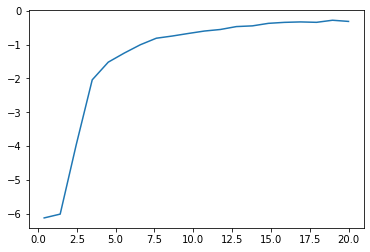

In [3]:
plt.plot(temperatures, energies)

In [4]:
import utils

T = np.linspace(0.4,20,100)
E = np.zeros(np.shape(T))

for i in range(len(T)):
    E[i] = utils._ising_exact_energy_2D(T[i])

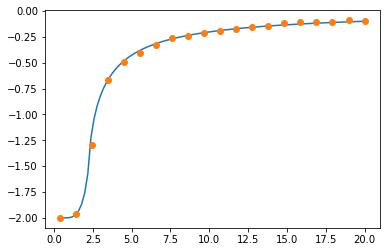

In [6]:
plt.plot(T,E)
plt.plot(temperatures, energies*16/49,'o')